**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 2**
Pandas para el análisis de datos en Python

---

*   NOMBRE: Iván Alejandro Anguiano Leal
*   MATRÍCULA: A00817460


---

En esta actividad usarás el archivo de datos `LaqnData.csv`. Cada fila de este conjunto de datos muestra un registro de medición, por hora, de uno de los siguientes cinco contaminantes del aire: 

*   `NO` (óxido nítrico)
*   `NO2` (dióxido de nitrógeno)
*   `NOX` (óxidos nitrosos)
*   `PM10` (partículas suspendidas con un diámetro aerodinámico igual o menor a 10 micrómetros)
*   `PM2.5` (partículas suspendidas con un diámetro aerodinámico igual o menor a 2.5 micrómetros)

Los datos se recopilaron en una ubicación de Londres durante todo el año 2017.

**NOTA IMPORTANTE:** Asegúrate de responder *explícitamente* todos los cuestionamientos.


1.	Descarga el archivo: `LaqnData.csv` y guarda, en un dataframe (`air_df`), todos sus registros.
*   Observa la estructura y contenido del dataframe con los atributos y métodos estudiados (`shape`, `columns`, `head()`, `tail()`, `dtypes`)
*   Calcula el porcentaje total de valores faltantes

In [1]:
import pandas as pd
air_df=pd.read_csv('./LaqnData.csv')
air_df.info()
air_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43800 entries, 0 to 43799
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     43800 non-null  object 
 1   Species                  43800 non-null  object 
 2   ReadingDateTime          43800 non-null  object 
 3   Value                    40570 non-null  float64
 4   Units                    43800 non-null  object 
 5   Provisional or Ratified  43800 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.0+ MB


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,CT3,NO,01/01/2017 00:00,3.5,ug m-3,R
1,CT3,NO,01/01/2017 01:00,3.6,ug m-3,R
2,CT3,NO,01/01/2017 02:00,2.2,ug m-3,R
3,CT3,NO,01/01/2017 03:00,2.1,ug m-3,R
4,CT3,NO,01/01/2017 04:00,3.3,ug m-3,R


2.	Obtén la cantidad de valores únicos por columna (`nunique()`) para responder:


*   ¿Cuántas mediciones se hicieron?
*   ¿Cuántos contaminantes del aire (`Species`) se analizaron?
*   ¿Qué columnas no agregan ningún valor informativo porque el mismo valor en todo el conjunto de datos? Elimínalas del dataframe.
*   La columna `Units` tampoco posee valor informativo. Verifícalo con la función `unique()` y elimínala del dataframe.

In [2]:
mediciones=len(air_df)
print(f"Total de mediciones: {mediciones}")
contaminantes=air_df.Species.unique()
print(f"Total contaminantes: {len(contaminantes)}")
sites=air_df.Site.unique()
print(f"Total sitios: {len(sites)}")
units=air_df.Units.unique()
print(f"Total unidades: {len(units)}")
opciones=air_df['Provisional or Ratified'].unique()
print(f"Total opciones: {len(opciones)}")
air_df.drop(['Site','Provisional or Ratified'],axis=1, inplace=True)
air_df.head()

Total de mediciones: 43800
Total contaminantes: 5
Total sitios: 1
Total unidades: 3
Total opciones: 1


,Species,ReadingDateTime,Value,Units
0,NO,01/01/2017 00:00,3.5,ug m-3
1,NO,01/01/2017 01:00,3.6,ug m-3
2,NO,01/01/2017 02:00,2.2,ug m-3
3,NO,01/01/2017 03:00,2.1,ug m-3
4,NO,01/01/2017 04:00,3.3,ug m-3


3.	Realiza el conteo de valores por categoría (`value_counts()`) para la columna `Species` y determina si las lecturas de cada contaminante coincide con el total de mediciones.

In [3]:
Frecuency_table=air_df.Species.value_counts()
print(Frecuency_table)
total=0
for i in range(len(Frecuency_table)):
    total+=Frecuency_table[i]
print(f"Mediciones totales: {mediciones}")
print(f"Suma de total de mediciones por especie: {total}")

NO       8760
NO2      8760
NOX      8760
PM10     8760
PM2.5    8760
Name: Species, dtype: int64
Mediciones totales: 43800
Suma de total de mediciones por especie: 43800


4.	Utiliza la función `groupby()` para determinar el promedio del valor por contaminante.

In [4]:
contaminanteMean=air_df.groupby('Species').Value.mean()
print(contaminanteMean)

Species
NO       15.045115
NO2      38.010185
NOX      61.078661
PM10     22.551704
PM2.5    14.999831
Name: Value, dtype: float64


5.	El conjunto de datos está en un formato largo. Aplique la función apropiada para cambiarlo al formato ancho (`ReadingDateTime` como índice y cada contaminante en una columna). Nombre el dataframe resultante como `pvt_df`.

In [5]:
pvt_df=air_df.pivot(columns='Species',index='ReadingDateTime',values='Value')
print(pvt_df)

Species            NO   NO2   NOX  PM10  PM2.5
ReadingDateTime                               
01/01/2017 00:00  3.5  30.8  36.2  35.7    NaN
01/01/2017 01:00  3.6  31.5  37.0  28.5    NaN
01/01/2017 02:00  2.2  27.3  30.7  22.7    NaN
01/01/2017 03:00  2.1  23.5  26.8  20.5    NaN
01/01/2017 04:00  3.3  28.0  33.0  22.1    NaN
...               ...   ...   ...   ...    ...
31/12/2017 19:00  0.7  17.5  18.5  16.3   -2.0
31/12/2017 20:00  0.7  17.5  18.6  14.5    6.0
31/12/2017 21:00  0.7  14.1  15.1   8.6    5.0
31/12/2017 22:00  1.1  22.0  23.6  12.5    5.0
31/12/2017 23:00  0.9  19.4  20.7  10.4    6.0

[8760 rows x 5 columns]


6.	A través de la función `describe()` responde:

*   ¿Cuál es el mayor valor de `NO2` registrado? ¿A qué día pertenece?
*   ¿Cuál es el menor valor de `PM10` registrado?¿A qué día pertenece?
*   ¿Cuál es la mediana del `NO`? ¿Cómo se interpreta?
*   ¿Cuál es el primer cuartil de `PM2.5`? ¿Qué significa?

In [6]:

MaxNo2=pvt_df[pvt_df['NO2']==pvt_df['NO2'].max()]
print(f"El dia {MaxNo2.index[0]} se registro el mayor valor de NO2 {MaxNo2['NO2']}")
MinPM10=pvt_df[pvt_df['PM10']==pvt_df['PM10'].min()]
print(f"El dia {MinPM10.index[0]} se registro el menor valor de PM10 {MinPM10['NO2']}")
print(f"La mediana de NO es: {pvt_df['NO'].median()}")
print(f"El primer cuartil de PM2.5 se encuentra en: {1/4*len(pvt_df['PM2.5'])}")
pvt_df.describe()


El dia 24/01/2017 19:00 se registro el mayor valor de NO2 ReadingDateTime
24/01/2017 19:00    120.2
Name: NO2, dtype: float64
El dia 12/09/2017 23:00 se registro el menor valor de PM10 ReadingDateTime
12/09/2017 23:00    7.0
Name: NO2, dtype: float64
La mediana de NO es: 7.1
El primer cuartil de PM2.5 se encuentra en: 2190.0


Species,NO,NO2,NOX,PM10,PM2.5
count,8660.000000,8660.000000,8660.000000,8657.000000,5933.000000
mean,15.045115,38.010185,61.078661,22.551704,14.999831
std,26.678565,18.580841,54.584805,15.344755,13.558588
min,-2.000000,2.800000,1.000000,-5.600000,-8.000000
25%,3.100000,23.800000,30.300000,13.900000,7.000000
50%,7.100000,35.300000,46.900000,19.500000,11.000000
75%,15.500000,49.900000,73.800000,27.300000,18.000000
max,401.799990,120.200000,734.299990,633.099980,128.000000


7.	Dibuja un histograma para cada columna de `pvt_df`. ¿Qué contaminante tiene mayor variabilidad?

NO2

<AxesSubplot:ylabel='Frequency'>

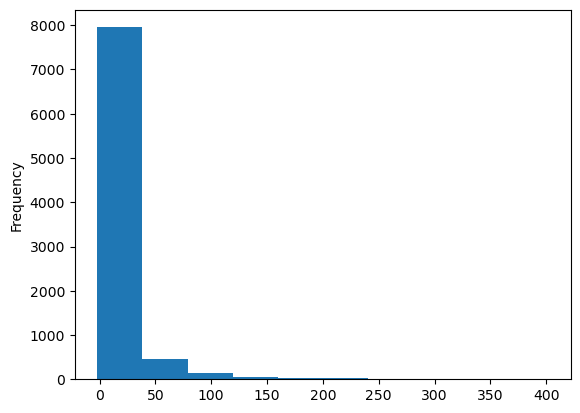

In [7]:
pvt_df['NO'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

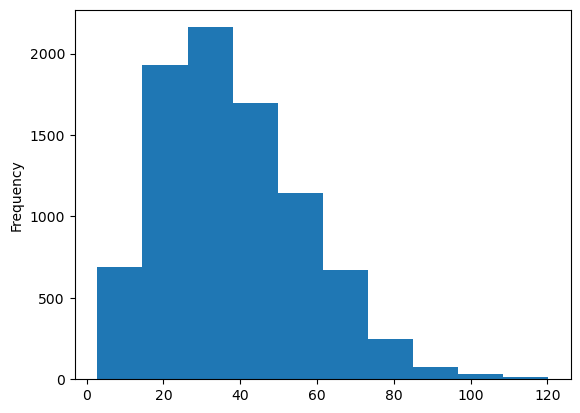

In [8]:
pvt_df['NO2'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

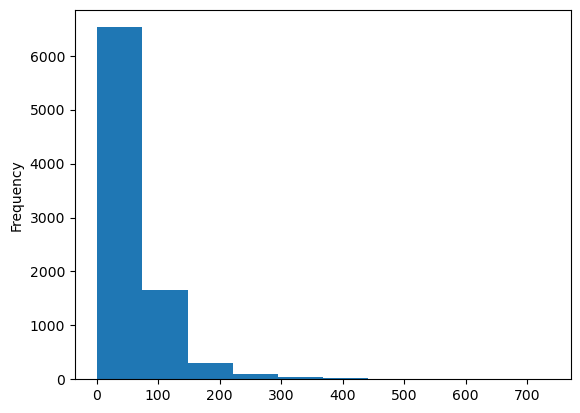

In [9]:
pvt_df['NOX'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

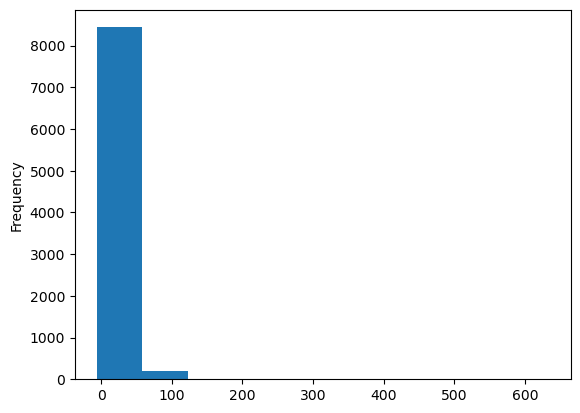

In [10]:
pvt_df['PM10'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

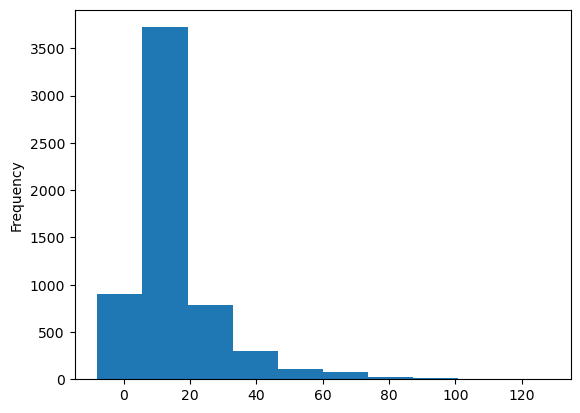

In [11]:
pvt_df['PM2.5'].plot.hist()

8.	Ejecuta el siguiente código y comenta qué hace cada línea:

In [12]:
#Separa la fecha y hora en un string
datetime_df = air_df.ReadingDateTime.str.split(' ',expand=True)
#Asigna el nombre  a las columnas
datetime_df.columns = ['Date','Time']
#Muestra el dataset
datetime_df
#Separa la columna de la fecha en dia, mes y año
date_df = datetime_df.Date.str.split('/',expand=True)
#Asigna el nomre de las nuevas columnas 
date_df.columns = ['Day','Month','Year']
date_df
#Elimina columnas ya existentes
air_df = air_df.join(date_df).join(datetime_df.Time).drop(columns=['ReadingDateTime','Year'])
#Asigna nuevos indices al dataset
air_df = air_df.set_index(['Month','Day','Time','Species'])
air_df

Value   Units
Month Day Time  Species               
01    01  00:00 NO         3.5  ug m-3
          01:00 NO         3.6  ug m-3
          02:00 NO         2.2  ug m-3
          03:00 NO         2.1  ug m-3
          04:00 NO         3.3  ug m-3
...                        ...     ...
12    31  19:00 PM2.5     -2.0  ug m-3
          20:00 PM2.5      6.0  ug m-3
          21:00 PM2.5      5.0  ug m-3
          22:00 PM2.5      5.0  ug m-3
          23:00 PM2.5      6.0  ug m-3

[43800 rows x 2 columns]

9. Ejecuta la siguiente instrucción y compara la salida del código anterior con `pvt_df` del ejercicio 8. ¿Son iguales?

No son iguales

In [13]:
air_df.unstack()

Value                           Units                         \
Species            NO   NO2   NOX  PM10 PM2.5      NO     NO2            NOX   
Month Day Time                                                                 
01    01  00:00   3.5  30.8  36.2  35.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          01:00   3.6  31.5  37.0  28.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          02:00   2.2  27.3  30.7  22.7   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          03:00   2.1  23.5  26.8  20.5   NaN  ug m-3  ug m-3  ug m-3 as NO2   
          04:00   3.3  28.0  33.0  22.1   NaN  ug m-3  ug m-3  ug m-3 as NO2   
...               ...   ...   ...   ...   ...     ...     ...            ...   
12    31  19:00   0.7  17.5  18.5  16.3  -2.0  ug m-3  ug m-3  ug m-3 as NO2   
          20:00   0.7  17.5  18.6  14.5   6.0  ug m-3  ug m-3  ug m-3 as NO2   
          21:00   0.7  14.1  15.1   8.6   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          22:00   1.1  22.0  23.6  12.5   5.0  ug m-3  ug m-3  ug m-3 as NO2   
          23:00   0.9  19.4  20.7  10.4   6.0  ug m-3  ug m-3  ug m-3 as NO2   

                                
Species           PM10   PM2.5  
Month Day Time                  
01    01  00:00  ug/m3  ug m-3  
          01:00  ug/m3  ug m-3  
          02:00  ug/m3  ug m-3  
          03:00  ug/m3  ug m-3  
          04:00  ug/m3  ug m-3  
...                ...     ...  
12    31  19:00  ug/m3  ug m-3  
          20:00  ug/m3  ug m-3  
          21:00  ug/m3  ug m-3  
          22:00  ug/m3  ug m-3  
          23:00  ug/m3  ug m-3  

[8760 rows x 10 columns]

10.	Explica cuáles son las diferencias y similitudes entre el par `melt()/pivot()` y el par `stack()/unstack()`. Si tuvieras que elegir una contraparte para `melt()` entre `stack()/unstack()`, ¿cuál elegirías? ¿Por qué?

Melt() y Pivot(): Ambos se utilizan para transformar DataFrames, pero melt() se enfoca en convertir datos de formato ancho a largo, mientras que pivot() hace lo contrario, convierte datos de formato largo a ancho.

Stack() y Unstack(): Estos métodos son utilizados en DataFrames con índices múltiples. stack() "apila" columnas en el índice, mientras que unstack() "desapila" una capa del índice convirtiéndola en columnas.

Elección:

Si tuviera que elegir una contraparte para melt(), elegiría stack(). Esto se debe a que melt() y stack() tienen un propósito similar de transformar datos de formato ancho a largo, lo que facilita la comparación y el flujo lógico de las operaciones. Melt() se utiliza comúnmente para datos en formato ancho, y stack() puede ser más intuitivo y coherente para transformaciones en ese sentido.